In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv('F:\\study\\ml\\DataSet\\Tap4fun\\tap_fun_train.csv',nrows=5)

In [3]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 4.7 KB


In [4]:
c_int=df_train.select_dtypes(include=['int64']).apply(pd.to_numeric,downcast='unsigned')
c_float=df_train.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')

In [5]:
o_df=df_train.copy()

In [6]:
o_df[c_int.columns]=c_int
o_df[c_float.columns]=c_float

In [7]:
dtypes=o_df.dtypes
dtypes_col=dtypes.index
dtypes_type=[i.name for i in dtypes.values]
column_type=dict(zip(dtypes_col,dtypes_type))

In [8]:
#column_type

In [9]:
column_type.pop('register_time')

'object'

In [10]:
data_train=pd.read_csv('F:\\study\\ml\\DataSet\\Tap4fun\\tap_fun_train.csv',
                      dtype=column_type,parse_dates=['register_time'],infer_datetime_format=True)

In [11]:
data_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: datetime64[ns](1), float32(13), uint16(1), uint8(94)
memory usage: 340.4 MB


In [12]:
train_feat2=data_train.copy()
# test_feat=data_test


In [13]:
train_feat2.shape

(2288007, 109)

In [14]:
del data_train

In [15]:
train_feat2.shape

(2288007, 109)

In [16]:
label_train=train_feat2['prediction_pay_price']

In [17]:
train_feat2.shape

(2288007, 109)

In [18]:
train_feat2['ivory_qua1']=train_feat2.ivory_add_value+train_feat2.ivory_reduce_value
train_feat2['ivory_qua2']=train_feat2.ivory_add_value-train_feat2.ivory_reduce_value

In [19]:
train_feat2['stone_qua1']=train_feat2.stone_add_value+train_feat2.stone_reduce_value
train_feat2['stone_qua2']=train_feat2.stone_add_value-train_feat2.stone_reduce_value

In [20]:
train_feat2['meat_qua1']=train_feat2.meat_add_value+train_feat2.meat_reduce_value
train_feat2['meat_qua2']=train_feat2.meat_add_value-train_feat2.meat_reduce_value

In [21]:
train_feat2['wood_qua1']=train_feat2.wood_add_value+train_feat2.wood_reduce_value
train_feat2['wood_qua2']=train_feat2.wood_add_value-train_feat2.wood_reduce_value

In [22]:
# for test feat
# test_feat2['ivory_qua1']=test_feat.ivory_add_value+test_feat.ivory_reduce_value
# test_feat2['ivory_qua2']=test_feat.ivory_add_value-test_feat.ivory_reduce_value
# test_feat2['stone_qua1']=test_feat.stone_add_value+test_feat.stone_reduce_value
# test_feat2['stone_qua2']=test_feat.stone_add_value-test_feat.stone_reduce_value
# test_feat2['meat_qua1']=test_feat.meat_add_value+test_feat.meat_reduce_value
# test_feat2['meat_qua2']=test_feat.meat_add_value-test_feat.meat_reduce_value
# test_feat2['wood_qua1']=test_feat.wood_add_value+test_feat.wood_reduce_value
# test_feat2['wood_qua2']=test_feat.wood_add_value-test_feat.wood_reduce_value

In [23]:
# train_feat.shape

In [24]:
# train_feat2.shape

In [25]:
# test_feat2.shape

In [26]:
#train_corr2=train_feat2.corr()

In [27]:
#train_corr2['prediction_pay_price'].sort_values(ascending=False).head(40)

In [28]:
import re

In [29]:
train_feat2.columns.values[pd.Series(train_feat2.columns.values).str.contains('def')]

array(['sr_troop_defense_level', 'sr_infantry_def_level',
       'sr_cavalry_def_level', 'sr_shaman_def_level'], dtype=object)

In [30]:
type(pd.Series(train_feat2.columns.values).str.contains('def'))

pandas.core.series.Series

In [31]:
#del text

In [32]:
text_def=[]
for col in train_feat2.columns.values:
     if 'def' in col:
            text_def.append(col)

In [33]:
text_def

['sr_troop_defense_level',
 'sr_infantry_def_level',
 'sr_cavalry_def_level',
 'sr_shaman_def_level']

In [34]:
#train_coorr1.to_csv('F:\\study\\ml\\DataSet\\Tap4fun\\train_feat_corr.csv')
#del feat_def_qua
train_feat2.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pay_count,prediction_pay_price,ivory_qua1,ivory_qua2,stone_qua1,stone_qua2,meat_qua1,meat_qua2,wood_qua1,wood_qua2
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0.0,0.0,0.0,0.0,0.0,18375.0,14375.0,23825.0,16425.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
text_def=[]
for col in train_feat2.columns.values:
     if 'def' in col:
            text_def.append(col)

In [36]:
text_def

['sr_troop_defense_level',
 'sr_infantry_def_level',
 'sr_cavalry_def_level',
 'sr_shaman_def_level']

In [37]:
type(text_def)

list

In [38]:
text_troop=[]
for col in train_feat2.columns.values:
    if 'troop' in col :
        text_troop.append(col)

In [39]:
text_troop

['sr_troop_defense_level',
 'sr_troop_attack_level',
 'sr_troop_consumption_level',
 'sr_troop_load_level',
 'sr_guest_troop_capacity_level']

In [40]:
text_cavalry=[]
for col in train_feat2.columns.values:
    if 'sr_cavalry' in col :
        text_cavalry.append(col)

In [41]:
text_cavalry

['sr_cavalry_tier_2_level',
 'sr_cavalry_atk_level',
 'sr_cavalry_tier_3_level',
 'sr_cavalry_def_level',
 'sr_cavalry_hp_level',
 'sr_cavalry_tier_4_level']

In [42]:
text_infantry=[]
for col in train_feat2.columns.values:
    if 'sr_infantry' in col :
        text_infantry.append(col)

In [43]:
text_infantry

['sr_infantry_tier_2_level',
 'sr_infantry_atk_level',
 'sr_infantry_tier_3_level',
 'sr_infantry_def_level',
 'sr_infantry_hp_level',
 'sr_infantry_tier_4_level']

In [44]:
text_shaman=[]
for col in train_feat2.columns.values:
    if 'sr_shaman' in col :
        text_shaman.append(col)

In [45]:
text_shaman

['sr_shaman_tier_2_level',
 'sr_shaman_atk_level',
 'sr_shaman_tier_3_level',
 'sr_shaman_def_level',
 'sr_shaman_hp_level',
 'sr_shaman_tier_4_level']

In [46]:
text_speed=[]
for col in train_feat2.columns.values:
    if 'speed' in col :
        text_speed.append(col)

In [47]:
text_speed

['sr_training_speed_level',
 'sr_construction_speed_level',
 'sr_healing_speed_level',
 'sr_alliance_march_speed_level',
 'sr_pvp_march_speed_level',
 'sr_gathering_march_speed_level']

In [48]:
train_feat2['def_qua1']=0.0
for name in text_def:
    train_feat2['def_qua1']+=train_feat2[name]

In [49]:
#pd.Series(train_feat2.columns.values) .str.contains('def')

In [50]:
#train_feat2[train_feat2.sr_troop_attack_level != 0][train_feat2.columns.values[pd.Series(train_feat2.columns.values) .str.contains('def')]]

In [51]:
train_feat2['def_qua1']=0.0
for name in text_def:
    train_feat2['def_qua1']+=train_feat2[name]

In [52]:
# test_feat2['def_qua1']=0.0
# for name in text_def:
#     test_feat2['def_qua1']+=test_feat2[name]

In [53]:
train_feat2['cavalry_qua1']=0.0
for name in text_cavalry:
    train_feat2['cavalry_qua1']+=train_feat2[name]

In [54]:
# test_feat2['cavalry_qua1']=0.0
# for name in text_cavalry:
#     test_feat2['cavalry_qua1']+=test_feat2[name]

In [55]:
train_feat2['infantry_qua1']=0.0
for name in text_infantry:
    train_feat2['infantry_qua1']+=train_feat2[name]

In [56]:
# test_feat2['infantry_qua1']=0.0
# for name in text_infantry:
#     test_feat2['infantry_qua1']+=test_feat2[name]

In [57]:
train_feat2['shaman_qua1']=0.0
for name in text_shaman:
    train_feat2['shaman_qua1']+=train_feat2[name]

In [58]:
# test_feat2['shaman_qua1']=0.0
# for name in text_shaman:
#     test_feat2['shaman_qua1']+=test_feat2[name]

In [59]:
train_feat2['speed_qua1']=0.0
for name in text_speed:
    train_feat2['speed_qua1']+=train_feat2[name]

In [60]:
# test_feat2['speed_qua1']=0.0
# for name in text_speed:
#     test_feat2['speed_qua1']+=test_feat2[name]

In [61]:
train_feat2['troop_qua1']=0.0
for name in text_troop:
    train_feat2['troop_qua1']+=train_feat2[name]

In [62]:
# test_feat2['troop_qua1']=0.0
# for name in text_troop:
#     test_feat2['troop_qua1']+=test_feat2[name]

In [63]:
train_feat2.columns.values[pd.Series(train_feat2.columns.values).str.contains('^pv')]

array(['pvp_battle_count', 'pvp_lanch_count', 'pvp_win_count',
       'pve_battle_count', 'pve_lanch_count', 'pve_win_count'],
      dtype=object)

In [64]:
train_feat2.columns.values[pd.Series(train_feat2.columns.values).str.contains('pv')]

array(['bd_hero_pve_level', 'sr_pvp_march_speed_level',
       'pvp_battle_count', 'pvp_lanch_count', 'pvp_win_count',
       'pve_battle_count', 'pve_lanch_count', 'pve_win_count'],
      dtype=object)

In [65]:
# train_feat2['pvp_lanch_rate_qua1']=train_feat2.pvp_lanch_count/train_feat2.pvp_battle_count
# train_feat2['pvp_win_rate_qua1']=train_feat2.pvp_win_count / train_feat2.pvp_battle_count
# train_feat2['pvp_win_lanch_rate_qua1']=train_feat2.pvp_win_count / \
# train_feat2.pvp_lanch_count
# train_feat2['pve_lanch_rate_qua1']=train_feat2.pve_lanch_count/train_feat2.pve_battle_count
# train_feat2['pve_win_rate_qua1']=train_feat2.pve_win_count / train_feat2.pve_battle_count
# train_feat2['pve_win_lanch_rate_qua1']=train_feat2.pve_win_count / \
# train_feat2.pve_lanch_count

In [66]:
# text_mi=train_feat2.columns[pd.Series(train_feat2.columns.values).str.contains('qua')].tolist()
# for name in text_mi :
#     name2='x_avg_mi_'+name
#     #print(name2)
#     train_feat2[name2]=train_feat2[name] / train_feat2.avg_online_minutes

# text_top=['ivory','stone','wood','meat']
# text_top_add=[]
# for name in text_top:
#     name2=name+'_add'
#     text_top_add.extend(train_feat2.columns[pd.Series(train_feat2.columns.values).str.contains(name2)].tolist())

# text_top_add2=[]
# for name in text_top_add :
#     name2='x_avg_mi_'+name
#     train_feat2[name2]=train_feat2[name] / train_feat2.avg_online_minutes
#     text_top_add2.append(name2)


In [67]:
# #
# train_feat2['pvp_lanch_rate_qua1']=train_feat2.pvp_lanch_count / train_feat2.pvp_battle_count
# train_feat2['pvp_win_rate_qua1']=train_feat2.pvp_win_count / trainhttp://localhost:8888/notebooks/Tap4fun/TFTest22.ipynb#_feat2.pvp_battle_count
# train_feat2['pve_lanch_rate_qua1']=train_feat2.pve_lanch_count / train_feat2.pve_battle_count
# train_feat2['pve_win_rate_qua1']=train_feat2.pve_win_count / train_feat2.pve_battle_count
# train_feat2['pvep_battle_qua1']=train_feat2.pvp_battle_count + train_feat2.pve_battle_count
# train_feat2['pvep_win_qua1']=train_feat2.pvp_win_count + train_feat2.pve_win_count
# train_feat2['pvep_lanch_qua1']=train_feat2.pvp_lanch_count + train_feat2.pve_lanch_count

In [68]:
# train_feat2['pvep_pve_battle_rate_qua1']=train_feat2.pve_battle_count / train_feat2.pvep_battle_qua1
# train_feat2['pvep_pvp_battle_rate_qua1']=train_feat2.pvp_battle_count / train_feat2.pvep_battle_qua1

# train_feat2['pvep_pve_lanch_rate_qua1']=train_feat2.pve_lanch_count / train_feat2.pvep_lanch_qua1
# train_feat2['pvep_pvp_lanch_rate_qua1']=train_feat2.pvp_lanch_count / train_feat2.pvep_lanch_qua1

# train_feat2['pvep_pve_win_rate_qua1']=train_feat2.pve_win_count / train_feat2.pvep_win_qua1
# train_feat2['pvep_pvp_win_rate_qua1']=train_feat2.pvp_win_count / train_feat2.pvep_win_qua1



In [69]:
train_feat2['price_per_count_qua1']=train_feat2.pay_price / train_feat2.pay_count

In [70]:
###############################################



#train_feat2.fillna(0,inplace=True)



###############################################

In [71]:
train_feat2.shape

(2288007, 124)

In [72]:
train_feat2_int=train_feat2.select_dtypes(include=['uint16','uint8'])


In [73]:
train_feat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 124 entries, user_id to price_per_count_qua1
dtypes: datetime64[ns](1), float32(22), float64(6), uint16(1), uint8(94)
memory usage: 523.7 MB


In [74]:
train_feat2_int.head()

,user_id,infantry_add_value,infantry_reduce_value,cavalry_add_value,cavalry_reduce_value,shaman_add_value,shaman_reduce_value,wound_infantry_add_value,wound_infantry_reduce_value,wound_cavalry_add_value,...,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,pay_count
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1593,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1594,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1596,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
train_feat2_float=train_feat2.select_dtypes(include=['float64','float32']).apply(pd.to_numeric,downcast='float')
#train_feat2.select_dtypes(include=['float64','float32']).apply(pd.to_numeric,downcast='float')
#..apply(pd.to_numeric,downcast='float')

In [76]:
train_feat2_float.head()

,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,...,meat_qua2,wood_qua1,wood_qua2,def_qua1,cavalry_qua1,infantry_qua1,shaman_qua1,speed_qua1,troop_qua1,price_per_count_qua1
0,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,0.0,0.0,...,14375.0,23825.0,16425.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [77]:
train_feat3=pd.concat([train_feat2_int,train_feat2_float],axis=1)

In [78]:
train_feat3.drop(labels=['prediction_pay_price'],axis=1,inplace=True)
#train_feat3.prediction_pay_price

In [79]:
train_feat3.shape

(2288007, 122)

In [80]:
#train_feat3.fillna(0,inplace=True)

In [81]:
train_feat3.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 122 entries, user_id to price_per_count_qua1
dtypes: float32(27), uint16(1), uint8(94)
memory usage: 445.1 MB


In [82]:
del train_feat2

In [83]:
#train_feat3.isnull().sum().sum()

In [84]:
params={
    'boosting_type':'gbdt',
    'objective':'mse',
    'metric':'rmse',
    'min_child_weigth':3,
    'num_leaves':2**5,
    'lambda_l2':10,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'colsample_bylevel':0.7,
    'learning_rate':0.05,
    'tree_method':'exact',
    'seed':2017,
    'nthread':4,
    'silent':True
}

In [85]:
import time
import lightgbm as lgb

In [86]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [87]:
#train_feat2.shape

In [88]:
X_train,X_test,y_train,y_test=train_test_split(train_feat3,label_train,test_size=0.5,random_state=73)

In [89]:
X_train.head()

,user_id,infantry_add_value,infantry_reduce_value,cavalry_add_value,cavalry_reduce_value,shaman_add_value,shaman_reduce_value,wound_infantry_add_value,wound_infantry_reduce_value,wound_cavalry_add_value,...,meat_qua2,wood_qua1,wood_qua2,def_qua1,cavalry_qua1,infantry_qua1,shaman_qua1,speed_qua1,troop_qua1,price_per_count_qua1
1125738,19370,0,0,0,0,0,0,0,0,0,...,35543.0,51444.0,29884.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1313562,19690,0,0,0,0,0,0,0,0,0,...,53331.0,61837.0,24989.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
990411,58009,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
533228,38602,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2259930,14969,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [90]:
y_train.head()

1125738    0.0
1313562    0.0
990411     0.0
533228     0.0
2259930    0.0
Name: prediction_pay_price, dtype: float32

In [91]:
import  matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(8,4)
%matplotlib inline

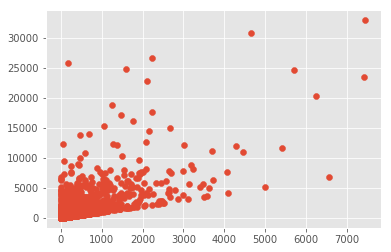

In [92]:
plt.scatter(x=train_feat2_float.pay_price,y=train_feat2_float.prediction_pay_price)

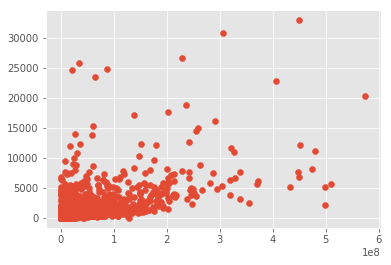

In [93]:
plt.scatter(x=train_feat2_float.ivory_add_value,y=train_feat2_float.prediction_pay_price)

In [94]:
train_feat2_float.prediction_pay_price.skew()

162.61414

In [95]:
train_feat2_float.pay_price.skew()

139.58662

In [96]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

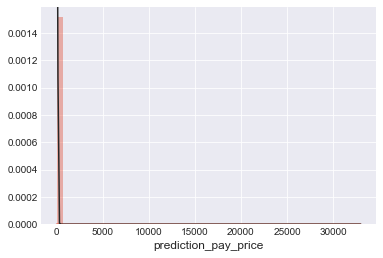

In [97]:
sns.distplot(train_feat2_float.prediction_pay_price,fit=norm)

In [98]:
np.log(train_feat2_float.prediction_pay_price)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


nan

In [ ]:
# from sklearn.grid_search import GridSearchCV
# from sklearn.pipeline import Pipeline

# # pipeline=Pipeline({
# #     ('lgb',lgb.LGBMRegressor(boosting_type='gbdt',objective='mse',metric='rmes'#, 
# #                              #tree_method='exact',seed=2017,nthread=2,silent=True
# #                             ))
# # })
# # params={
# #     'num_leaves':(10,20,30),
# #     'max_depth':(3,4,5),
# #     'learning_rate':(0.01,0.05,0.1),
# #     'subsample':(0.5,0.6,0.7),
# #     'colsample_bytree':(0.7,0.8,0.9)
    
# # }

# params={
# 	'max_bin':(100,150,200),
#     'num_leaves':(10,20,30),
# 	'max_depth':(3,4,5),
# 	'min_data_in_leaf':(10,20,30),
# 	'bagging_freq':(5,10,20),
# 	'lambda_l2':(1,5,10)
# }

# estimator = lgb.LGBMRegressor(
#         #num_leaves = 50, # cv调节50是最优值
#         #max_depth = 13,
#        #learning_rate =0.1, 
#         #n_estimators = 1000, 
#         objective = 'regression',
#         metric='rmse',
#         learning_rate=0.05,
#         subsample=0.6,
#         colsample_bytree=0.8
#         #min_child_weight = 1, 
#         #subsample = 0.8,
#         #colsample_bytree=0.8,
#         #nthread = 7,
# )


# grid_search=GridSearchCV(estimator,params,scoring='neg_mean_squared_error',verbose=50,cv=5)
# grid_search.fit(X_train,y_train)

# print (u'最佳效果：%0.3f'%grid_search.best_score_)
# print (u'最优参数组合：')
# best_parameters=grid_search.best_estimator_.get_params()
# for param_name in sorted(params.keys()):
#     print ('\t%s:%r'%(param_name,best_parameters[param_name]))

# from sklearn.metrics import mean_squared_error
# predictions=grid_search.predict(X_test)
# np.sqrt(mean_squared_error(y_test,predictions))

# from sklearn.externals import joblib
# joblib.dump(grid_search,'F:\\study\\ml\\DataSet\\Tap4fun\\GSCV_lgb.model.gz',compress=True)

In [ ]:
# grid_search=GridSearchCV(pipeline,params,n_jobs=2,verbose=50,scoring='neg_mean_squared_error',cv=3)
# grid_search.fit(X_train,y_train)

In [ ]:
# data_test.info(memory_usage='deep')